# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 25.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
56193,0.0928,0.0659,0.2393,0.0293,0.0122,0.0830,1.0034,0.2148,0.6934,0.8032,7,7,7,7
157491,0.1563,0.0073,0.0049,0.0049,0.0049,0.0024,0.0024,0.2197,0.0024,0.0049,0,0,0,0
249438,0.7056,0.4834,0.0464,0.0195,0.0659,0.2515,1.2500,0.4980,0.1465,0.5444,5,5,1,1
242231,0.1953,0.4785,0.3003,0.4956,0.0171,0.0024,0.3833,0.4272,0.1831,0.3589,7,7,17,17
194686,0.2686,0.0171,0.0024,0.0049,0.0049,0.0146,0.1294,0.2856,0.0049,0.1074,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469821 entries, 0 to 469820
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          469821 non-null  float64
 1   Emg2          469821 non-null  float64
 2   Emg3          469821 non-null  float64
 3   Emg4          469821 non-null  float64
 4   Emg5          469821 non-null  float64
 5   Emg6          469821 non-null  float64
 6   Emg7          469821 non-null  float64
 7   Emg8          469821 non-null  float64
 8   Emg9          469821 non-null  float64
 9   Emg10         469821 non-null  float64
 10  repetition    469821 non-null  int64  
 11  rerepetition  469821 non-null  int64  
 12  stimulus      469821 non-null  int64  
 13  restimulus    469821 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.2 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000,469821.000000
mean,0.268114,0.156607,0.128820,0.109278,0.020653,0.037569,0.349515,0.402672,0.131860,0.270130,3.156387,2.382701,5.594729,4.278744
std,0.324583,0.297356,0.288758,0.312210,0.053065,0.090803,0.522189,0.513143,0.335658,0.439442,3.483117,3.324333,6.577557,6.291936
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.002400,0.004900,0.002400,0.004900,0.002400,0.078100,0.102500,0.002400,0.012200,0.000000,0.000000,0.000000,0.000000
50%,0.153800,0.019500,0.004900,0.004900,0.004900,0.007300,0.178200,0.251500,0.004900,0.100100,2.000000,0.000000,3.000000,0.000000
75%,0.361300,0.168500,0.144000,0.048800,0.007300,0.036600,0.397900,0.488300,0.112300,0.356400,6.000000,5.000000,10.000000,8.000000
max,4.643600,4.147900,4.638700,4.643600,1.992200,2.661100,4.641100,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     200217
8      15593
7      15585
2      15581
4      15579
12     15577
9      15553
11     15552
6      15541
5      15533
3      15531
10     15525
1      15505
14     10403
17     10402
13     10386
15     10360
16     10325
18      5198
21      5198
19      5193
23      5163
20      5161
22      5160
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.816126,-0.557894,-0.477257,-0.366851,-0.372023,-0.407506,-0.687218,-0.740920,-0.419805,-0.643168
1,-0.787995,-0.550037,-0.469195,-0.366851,-0.372023,-0.381992,-0.687218,-0.740920,-0.419805,-0.643168
2,-0.780745,-0.550037,-0.469195,-0.374266,-0.328458,-0.407506,-0.687218,-0.745314,-0.419805,-0.643168
3,-0.794956,-0.557894,-0.477257,-0.374266,-0.328458,-0.407506,-0.687218,-0.754285,-0.412897,-0.643168
4,-0.794956,-0.550037,-0.469195,-0.366851,-0.328458,-0.407506,-0.691692,-0.758679,-0.419805,-0.637841
...,...,...,...,...,...,...,...,...,...,...
394029,-0.830337,-0.557894,-0.477257,-0.374266,-0.328458,-0.182976,0.361296,-0.798957,-0.419805,-0.538963
394030,-0.837587,-0.557894,-0.469195,-0.366851,-0.328458,-0.108473,0.370065,-0.798957,-0.412897,-0.544291
394031,-0.837587,-0.557894,-0.469195,-0.374266,-0.328458,-0.058464,0.330694,-0.798957,-0.419805,-0.549405
394032,-0.830337,-0.557894,-0.469195,-0.374266,-0.328458,0.016039,0.313335,-0.803534,-0.412897,-0.554733


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 3s 27ms/step - loss: 1.2138 - accuracy: 0.6743 - val_loss: 0.7886 - val_accuracy: 0.7713
Epoch 2/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7089 - accuracy: 0.7945 - val_loss: 0.6243 - val_accuracy: 0.8166
Epoch 3/100
78/78 [==============================] - 2s 25ms/step - loss: 0.5848 - accuracy: 0.8283 - val_loss: 0.5314 - val_accuracy: 0.8410
Epoch 4/100
78/78 [==============================] - 2s 25ms/step - loss: 0.5129 - accuracy: 0.8466 - val_loss: 0.4890 - val_accuracy: 0.8550
Epoch 5/100
78/78 [==============================] - 2s 25ms/step - loss: 0.4675 - accuracy: 0.8585 - val_loss: 0.4295 - val_accuracy: 0.8689
Epoch 6/100
78/78 [==============================] - 2s 25ms/step - loss: 0.4262 - accuracy: 0.8698 - val_loss: 0.3997 - val_accuracy: 0.8784
Epoch 7/100
78/78 [==============================] - 2s 25ms/step - loss: 0.3922 - accuracy: 0.8796 - val_loss: 0.3759 - val_accuracy: 0.8847
Epoch 

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

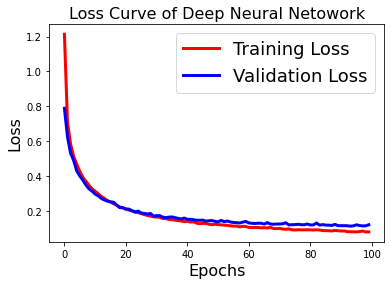

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

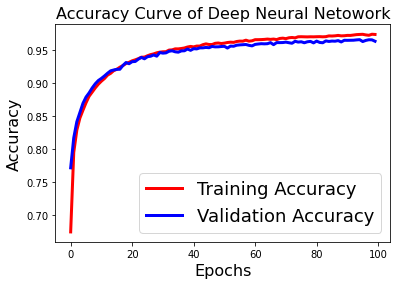

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  0,  0, ...,  0, 20, 20], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 96.28332508533506


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     39171
           1       0.97      0.95      0.96      1948
           2       0.97      0.92      0.94      2393
           3       0.94      0.94      0.94      2279
           4       0.95      0.96      0.96      2303
           5       0.95      0.97      0.96      2129
           6       0.98      0.98      0.98      2103
           7       0.93      0.95      0.94      2131
           8       0.99      0.93      0.96      2256
           9       0.96      0.92      0.94      2332
          10       0.91      0.84      0.87      2518
          11       0.98      0.96      0.97      2252
          12       0.94      0.85      0.89      2438
          13       0.97      0.97      0.97      1487
          14       0.95      0.97      0.96      1393
          15       0.94      0.95      0.94      1511
          16       0.98      0.97      0.97      1565
 

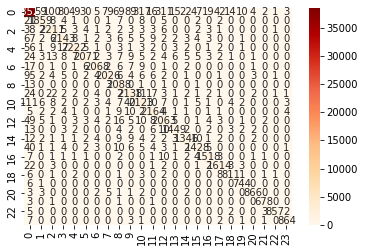

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2884896011775604
MSE: 3.0925298514091386
RMSE: 1.7585590269903193


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9627191511669074
Recall Score :  0.9628332508533506
f1_score :  0.9625393723892566
